In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data
import re

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [3]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

In [4]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/event_data'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/event_data'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [5]:
a1r = []
a25r = []
a50r = []

for i,j in enumerate(datalistSr):
    if 'a=1.0' in j:
        a1r.append(j)
    elif 'a=2.5' in j:
        a25r.append(j)
    else:
        a50r.append(j)
        
a1t = []
a25t = []
a50t = []
for i,j in enumerate(datalistSt):
    if 'a=1.0' in j:
        a1t.append(j)
    elif 'a=2.5' in j:
        a25t.append(j)
    else:
        a50t.append(j)

In [6]:
a1r_name = [i.split('/')[12] for i in a1r]
a1t_name = [i.split('/')[12] for i in a1t]
a25r_name = [i.split('/')[12] for i in a25r]
a25t_name = [i.split('/')[12] for i in a25t]

In [7]:
RF_list_r = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)

<h3 align="center">Separando as Funções do Receptor por Estação</h3>

In [8]:
RF_list_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)

<h3 align="center">Separando as Funções do Receptor pela distância Epicentral (gcarc)</h3>

BDCO = 0, BPPF = 1 ,BUCO = 2, GENI = 3, GRJU = 4, PRDT = 5, STNS = 6, STSR = 7, TRZN = 8

In [9]:
z = 8

<h3 align="center">a = 1.0</h3>

In [10]:
RF = []
RF_name_r = []

for i,j in enumerate(RF_list_r[z]):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF += op.read(j)
        RF_name_r.append(j.split('/')[11])

In [11]:
RF_name = [i.split('.eqr')[0] for i in RF_name_r]

In [12]:
TF = []
for i,j in enumerate(RF_list_t[z]):
    for l,k in enumerate(RF_name):
        if k in j:
            TF += op.read(j)

<h3 align="center">a = 2.5</h3>

In [13]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(RF_list_r_25[z]):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF_25 += op.read(j)
        RF_name_r_25.append(j.split('/')[11])

In [14]:
RF_name_25 = [i.split('.eqr')[0] for i in RF_name_r_25]

In [15]:
TF_25 = []
for i,j in enumerate(RF_list_t_25[z]):
    for l,k in enumerate(RF_name_25):
        if k in j:
            TF_25 += op.read(j)

<h3 align="center">Separando as Funções do Receptor pela porcentagem da deconvolução</h3>

<h3 align="center">a = 1.0</h3>

In [16]:
RF_30_st = op.Stream()
RF_30 = []
TF_30 = []
RF_name_30 = []
for i,j in enumerate(RF):
    if j.stats.sac.user5 > 85:
        RF_30_st.append(j)
        TF_30.append(TF[i])
        RF_name_30.append(RF_name[i])

In [17]:
for i,j in enumerate(RF_30_st):
    RF_30.append(j)

<h3 align="center">a = 2.5</h3>

In [18]:
RF_30_25_st = op.Stream()
RF_30_25 = []
TF_30_25 = []
RF_name_30_25 = []
for i,j in enumerate(RF_25):
    if j.stats.sac.user5 > 85:
        RF_30_25_st.append(j)
        TF_30_25.append(TF_25[i])
        RF_name_30_25.append(RF_name_25[i])

In [19]:
for i,j in enumerate(RF_30_25_st):
    RF_30_25.append(j)

<h3 align="center">Plotando as Funções do Receptor</h3>

<h3 align="center">a = 1.0</h3>

In [20]:
RFgcarc = [i.stats.sac.gcarc for i in RF]
RFevdp = [i.stats.sac.evdp for i in RF]
RFbaz = [i.stats.sac.baz for i in RF]

orglisl = np.argsort(RFbaz)

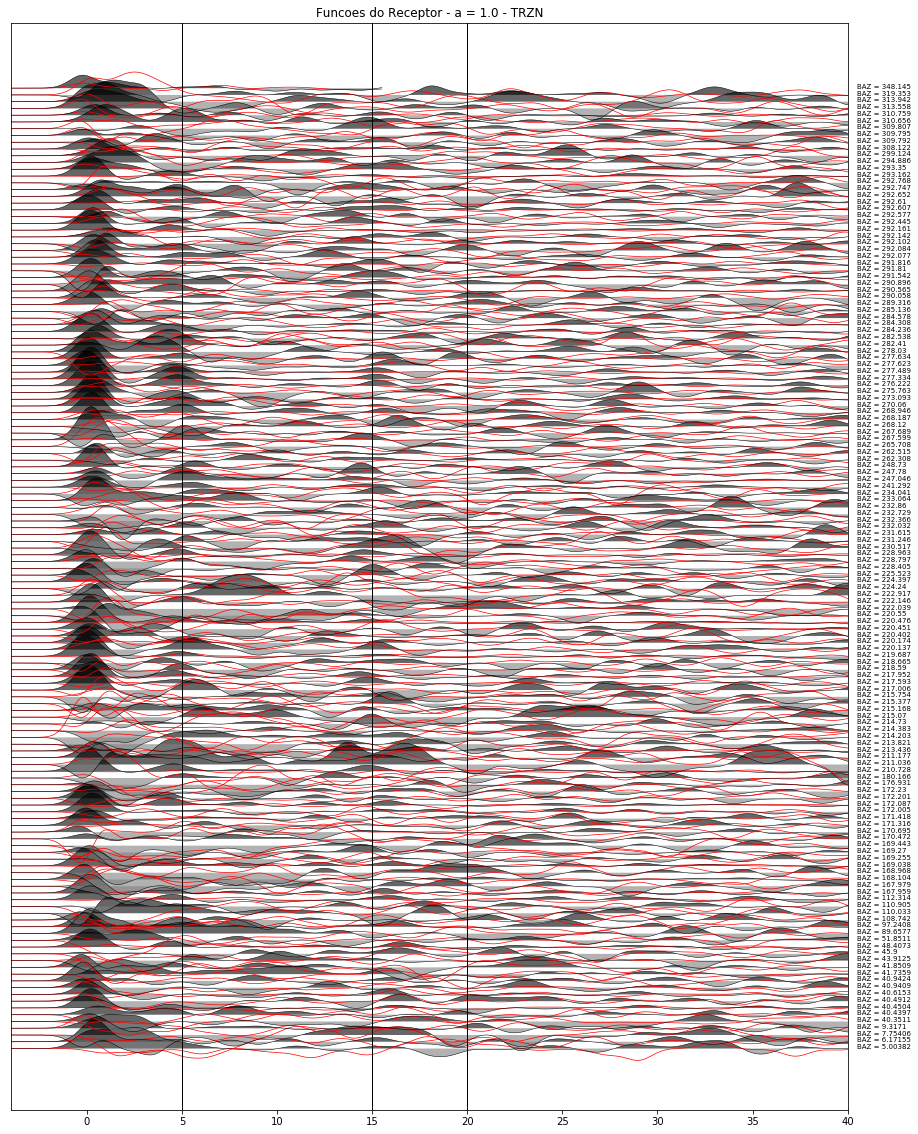

In [21]:
factor = 10
plt.figure(figsize = (15,20))
for j, i in enumerate(orglisl): 
    plt.plot(TF[i].times()-10,j/factor+TF[i].data,'r',linewidth=0.7)
    plt.plot(RF[i].times()-10,j/factor+RF[i].data,'k',linewidth=0.5)
    plt.fill_between(RF[i].times()-10,j/factor+RF[i].data,j/factor,where=(j/factor+RF[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF[i].times()-10,j/factor+RF[i].data,j/factor,where=(j/factor+RF[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor,'BAZ = %s' % (RFbaz[i]),fontsize=7)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)

In [22]:
RFgcarc_30 = [i.stats.sac.gcarc for i in RF_30]
RFevdp_30 = [i.stats.sac.evdp for i in RF_30]
RFbaz_30 = [i.stats.sac.baz for i in RF_30]
RFp_30 = [i.stats.sac.user8 for i in RF_30]

orglisl_30 = np.argsort(RFp_30)

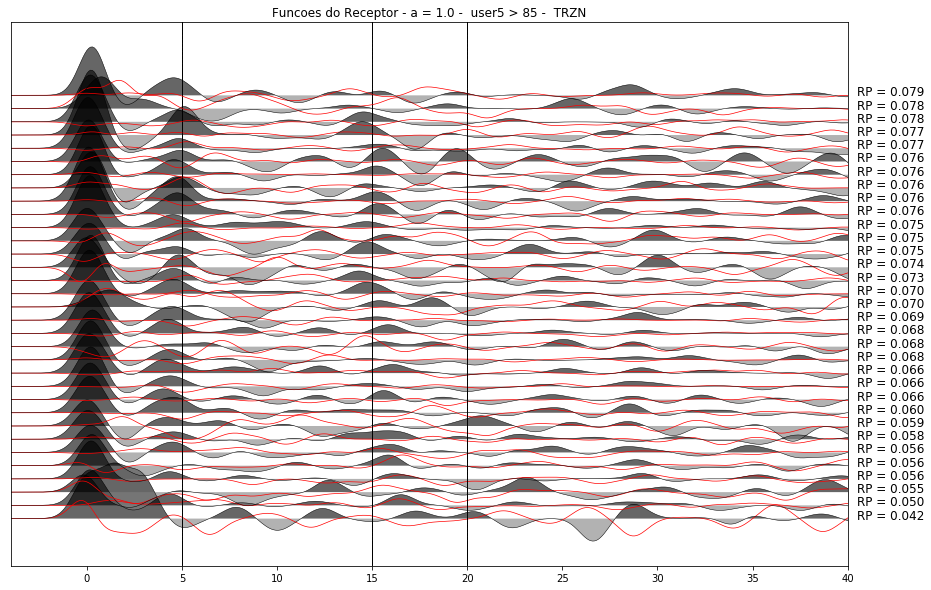

In [23]:
factor = 10
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl_30): 
    plt.plot(TF_30[i].times()-10,j/factor+TF_30[i].data,'r',linewidth=0.7)
    plt.plot(RF_30[i].times()-10,j/factor+RF_30[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30[i].times()-10,j/factor+RF_30[i].data,j/factor,where=(j/factor+RF_30[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30[i].times()-10,j/factor+RF_30[i].data,j/factor,where=(j/factor+RF_30[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(40.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30[i]),fontsize=12)
    #plt.text(40.5,j/factor,'BAZ = %s' % (RFbaz_30[i]),fontsize=7)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 -  user5 > 85 -  '+STA[z])
    plt.xlim(-4,40)



<h3 align="center">a = 2.5</h3>

In [24]:
RFgcarc_25 = [i.stats.sac.gcarc for i in RF_25]
RFevdp_25 = [i.stats.sac.evdp for i in RF_25]
RFbaz_25 = [i.stats.sac.baz for i in RF_25]
RFp_25 = [i.stats.sac.user8 for i in RF_25]


orglisl_25 = np.argsort(RFp_25)

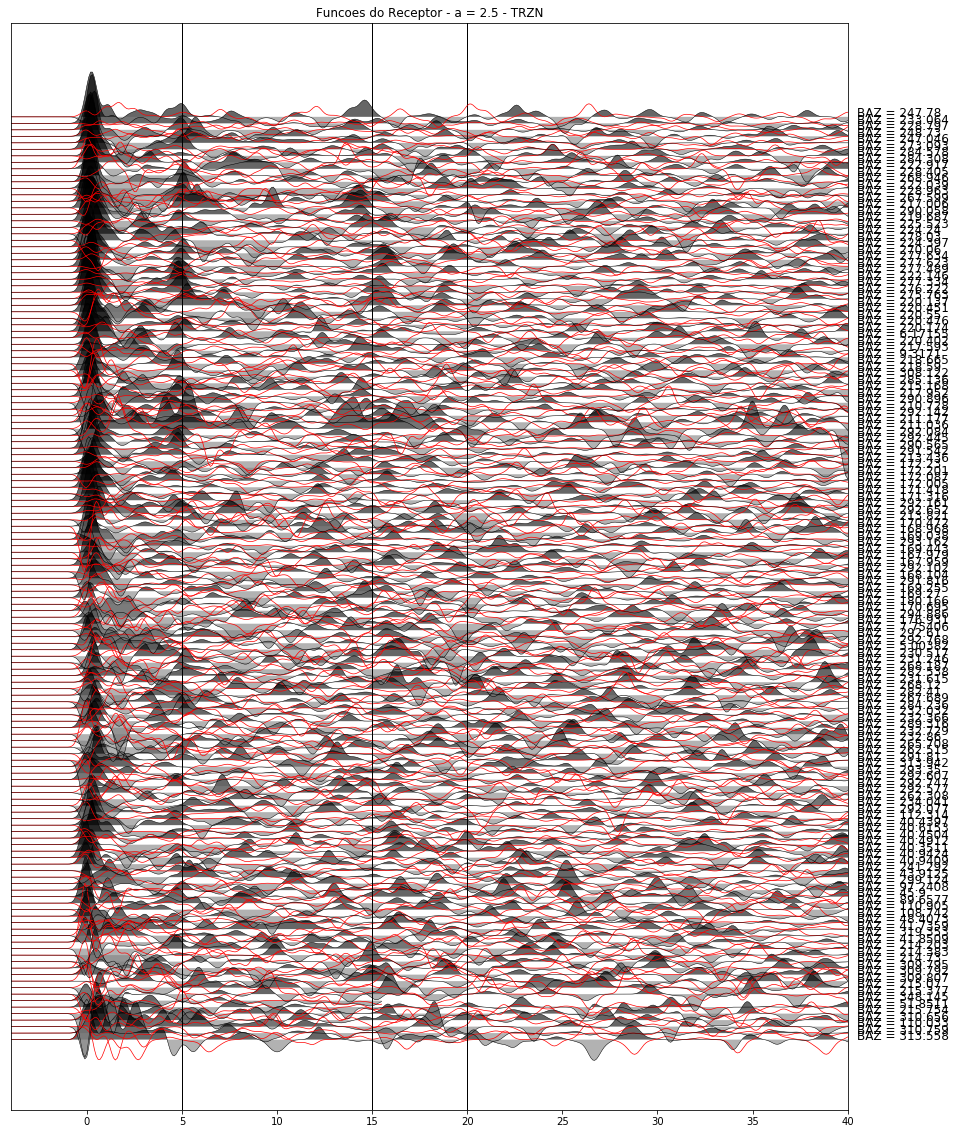

In [25]:
factor = 10
plt.figure(figsize = (15,20))
for j, i in enumerate(orglisl_25): 
    plt.plot(TF_25[i].times()-10,j/factor+TF_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_25[i].times()-10,j/factor+RF_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_25[i].times()-10,j/factor+RF_25[i].data,j/factor,where=(j/factor+RF_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_25[i].times()-10,j/factor+RF_25[i].data,j/factor,where=(j/factor+RF_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp[i]),fontsize=12)
    #plt.text(40.5,j/10,'p = %s' % (RFp_25[i]),fontsize=12)
    plt.text(40.5,j/factor,'BAZ = %s' % (RFbaz_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

In [26]:
RFgcarc_30_25 = [i.stats.sac.gcarc for i in RF_30_25]
RFevdp_30_25 = [i.stats.sac.evdp for i in RF_30_25]
RFbaz_30_25 = [i.stats.sac.baz for i in RF_30_25]
RFp_30_25 = [i.stats.sac.user8 for i in RF_30_25]

orglisl_30_25 = np.argsort(RFbaz_30_25)

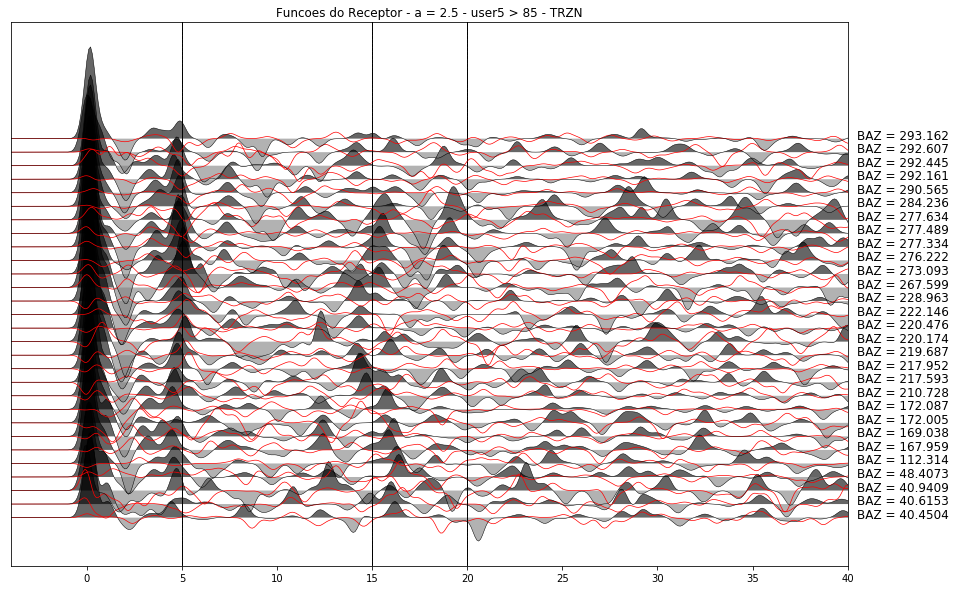

In [27]:
factor = 10
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl_30_25): 
    plt.plot(TF_30_25[i].times()-10,j/factor+TF_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,j/factor,where=(j/factor+RF_30_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,j/factor,where=(j/factor+RF_30_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(40.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30_25[i]),fontsize=12)
    plt.text(40.5,j/factor,'BAZ = %s' % (RFbaz_30_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - user5 > 85 - '+STA[z])
    plt.xlim(-4,40)

<h3 align="center">Empilhando as Funções do Receptor após a filtragem</h3>

<h3 align="center">a = 1.0 </h3>

In [28]:
RF_stack_30 = np.array(RF_30).sum(axis=0)/len(RF_30)

In [29]:
y = []
for i,j in enumerate(RF_30): 
    y.append(j.data)

In [30]:
min_y = [min(a) for a in zip(*y)]
max_y = [max(a) for a in zip(*y)]

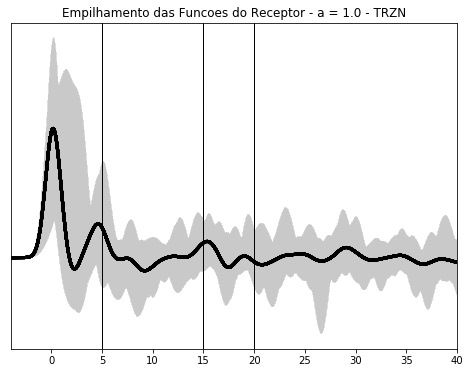

In [31]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RF_30): 
    plt.plot(RF[1].times()-10,RF_stack_30,'k',linewidth=3)
    plt.fill_between(RF_30[0].times()-10,min_y,max_y, facecolor='grey',alpha=0.01, interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)

<h3 align="center">a = 2.5 </h3>

In [32]:
RF_stack_30_25 = np.array(RF_30_25).sum(axis=0)/len(RF_30_25)

In [33]:
y_25 = []
for i,j in enumerate(RF_30_25): 
    y_25.append(j.data)

In [34]:
min_y_25 = [min(a) for a in zip(*y_25)]
max_y_25 = [max(a) for a in zip(*y_25)]

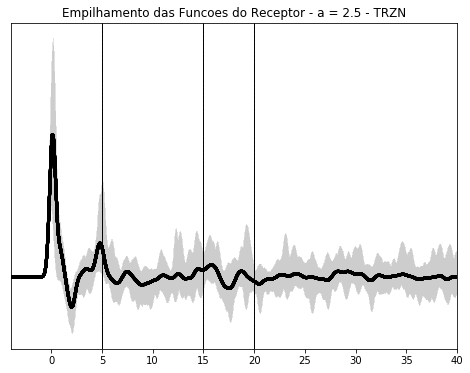

In [35]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RF_30_25): 
    plt.plot(RF[1].times()-10,RF_stack_30_25,'k',linewidth=3)
    plt.fill_between(RF_30_25[0].times()-10,min_y_25,max_y_25,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

<h3 align="center">Filtragem Visual das Funções do Receptor selecionadas</h3>

<h3 align="center">a = 1.0 </h3>

for j, i in enumerate(orglisl_30): 
    plt.plot(TF_30[i].times()-10,TF_30[i].data,'r',linewidth=0.5,label='FR - Transversal')
    plt.plot(RF_30[i].times()-10,RF_30[i].data,'k',linewidth=2,label='FR - Radial')
    plt.plot(RF[1].times()-10,RF_stack_30,'--k',linewidth=1,label='Linear Stacking')
    plt.legend()
    plt.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
    plt.axvline(x=5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
    plt.axvline(x=10, ymin=0.2, ymax=0.5, ls='dashed',c='k')
    plt.axvline(x=15, ymin=0.2, ymax=0.5, ls='dashed',c='m')
    plt.axvline(x=20, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
    plt.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
    plt.xlim(-7,40)
    plt.title("Avalie as Funçoes do Receptor (1 = Bom, 0 = Ruim) = ")
    time.sleep(2.0)
    display.clear_output(wait=True)
    plt.show()

In [38]:
RFselect = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [39]:
print(len(RFselect))
print(len(RF_30))

33
33


In [99]:
RFselect[12] = 0


In [100]:
for i,j in enumerate(RFselect):
    if j == 0:
        print(i)

9
10
12
14
19
29


In [101]:
new_RFfilter = [True if x ==1 else False for x in RFselect]

In [102]:
RFRbom_30 = list(itertools.compress(RF_30, new_RFfilter))
RFTbom_30 = list(itertools.compress(TF_30, new_RFfilter))
RFbomname_30 = list(itertools.compress(RF_name_30, new_RFfilter))

In [103]:
RF_bom_gcarc_30 = [i.stats.sac.gcarc for i in RFRbom_30]
RF_bom_baz_30 = [i.stats.sac.baz for i in RFRbom_30]
RF_bom_p_30 = [i.stats.sac.user8 for i in RFRbom_30]


orglisl_bom_30 = np.argsort(RF_bom_p_30)

In [104]:
len(orglisl_bom_30)

27

In [105]:
orglisl_bom_30

array([21, 10, 26,  4,  6,  0, 19, 22,  3, 23,  8, 14, 15, 12, 25, 11, 18,
       17, 24,  1, 20,  2,  5, 13,  9,  7, 16])

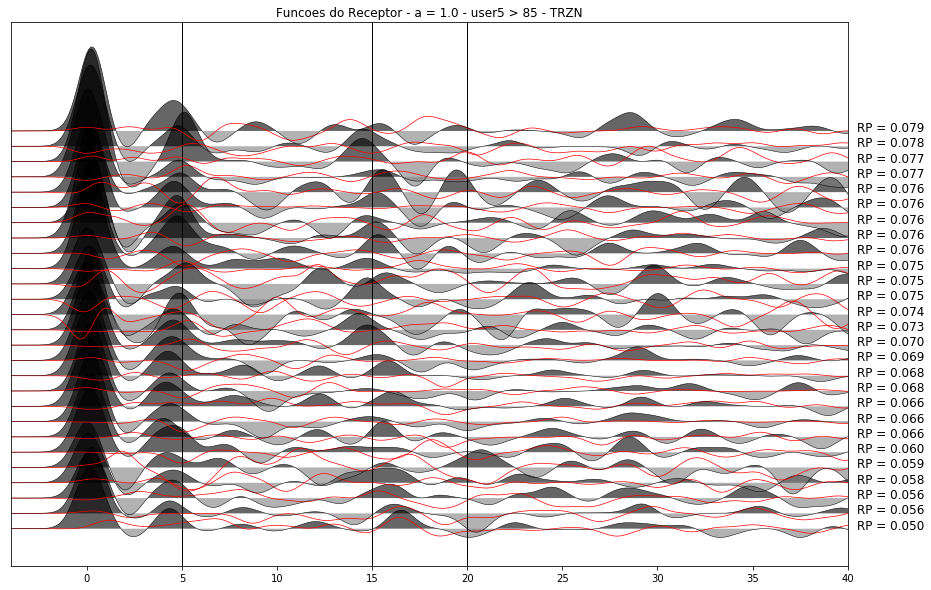

In [106]:
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl_bom_30): 
    plt.plot(RFTbom_30[i].times()-10,j/15+RFTbom_30[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30[i].times()-10,j/15+RFRbom_30[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30[i].times()-10,j/15+RFRbom_30[i].data,j/15,where=(j/15+RFRbom_30[i].data)>=j/15, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30[i].times()-10,j/15+RFRbom_30[i].data,j/15,where=(j/15+RFRbom_30[i].data)<=j/15, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(40.5,j/15,"RP = "+"{0:.3f}".format(RF_bom_p_30[i]),fontsize=12)
    #plt.text(40.5,j/10,'BAZ = %s' % (RF_bom_baz_30[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - user5 > 85 - '+STA[z])
    plt.xlim(-4,40)

In [107]:
RF_stack_30_final = np.array(RFRbom_30).sum(axis=0)/len(RFRbom_30)

In [108]:
RFT_stack_30_final = np.array(RFTbom_30).sum(axis=0)/len(RFTbom_30)

In [109]:
RF_stack_30_final_user8 = sum([i.stats.sac.user8 for i in RFRbom_30])/len(RFRbom_30)

In [110]:
y_30_final = []
for i,j in enumerate(RFRbom_30): 
    y_30_final.append(j.data)

In [111]:
min_y_30_final = [min(a) for a in zip(*y_30_final)]
max_y_30_final = [max(a) for a in zip(*y_30_final)]

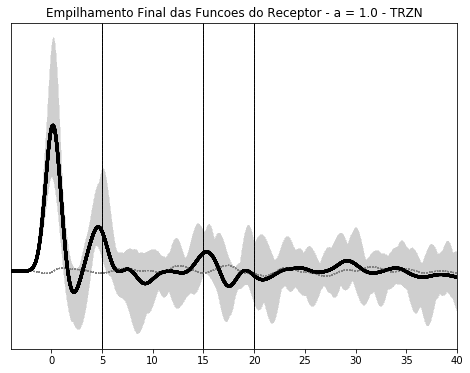

In [112]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RFRbom_30): 
    plt.plot(RF[1].times()-10,RFT_stack_30_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_final,'k',linewidth=3)
    plt.fill_between(RFRbom_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)

Salvando as Funcoes do Receptor:

In [113]:
for i,j in enumerate(RFRbom_30):
    header = {'kstnm':j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RFbomname_30[i]+'.eqr')

In [114]:
for i,j in enumerate(RFTbom_30):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RFbomname_30[i]+'.eqt')

Salvando o Empilhamento Final das Funcoes do Receptor:

In [115]:
header = {'kstnm': RFRbom_30[0].stats.sac.kstnm,'kevnm':RFRbom_30[0].stats.sac.kevnm,'stla': RFRbom_30[0].stats.sac.stla,
          'stlo': RFRbom_30[0].stats.sac.stlo,'user8':RF_stack_30_final_user8,'delta': RFRbom_30[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RF_stack_30_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/BP.'+STA[z]+'.T:a=1.0.eqr')

In [116]:
header = {'kstnm': RFRbom_30[0].stats.sac.kstnm,'kevnm':RFRbom_30[0].stats.sac.kevnm,'stla': RFRbom_30[0].stats.sac.stla,
          'stlo': RFRbom_30[0].stats.sac.stlo,'user8':RF_stack_30_final_user8,'delta': RFRbom_30[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RFT_stack_30_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/BP.'+STA[z]+'.T:a=1.0.eqt')

<h3 align="center">a = 2.5 </h3>

for j, i in enumerate(orglisl_30_25): 
    plt.plot(TF_30_25[i].times()-10,TF_30_25[i].data,'r',linewidth=0.5,label='FR - Transversal')
    plt.plot(RF_30_25[i].times()-10,RF_30_25[i].data,'k',linewidth=2,label='FR - Radial')
    plt.plot(RF[1].times()-10,RF_stack_30_25,'--k',linewidth=1,label='Linear Stacking')
    plt.legend()
    plt.axvline(x=0, ymin=0.2, ymax=0.8, ls='dashed',c='g')
    plt.axvline(x=5, ymin=0.2, ymax=0.5, ls='dashed',c='b')
    plt.axvline(x=10, ymin=0.2, ymax=0.5, ls='dashed',c='k')
    plt.axvline(x=15, ymin=0.2, ymax=0.5, ls='dashed',c='m')
    plt.axvline(x=20, ymin=0.1, ymax=0.5, ls='dashed',c='r')    
    plt.axvline(x=25, ymin=0.2, ymax=0.5, ls='dashed',c='y')    
    plt.xlim(-7,40)
    plt.title("Avalie as Funçoes do Receptor (1 = Bom, 0 = Ruim)")
    time.sleep(2.0)
    display.clear_output(wait=True)
    plt.show()

In [119]:
RFselect_25 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [120]:
print(len(RFselect_25))
print(len(RF_30_25))

29
29


In [142]:
RFselect_25[9] = 0

In [143]:
for i,j in enumerate(RFselect_25):
    if j == 0:
        print(i)

9
10


In [144]:
RFRbom_30_25 = []
RFTbom_30_25 = []
RFBomname_30_25 = []
orglisl_bom_30_25 = []
new_RFfilter_25 = []

In [145]:
new_RFfilter_25 = [True if x ==1 else False for x in RFselect_25]

In [146]:
RFRbom_30_25 = list(itertools.compress(RF_30_25, new_RFfilter_25))
RFTbom_30_25 = list(itertools.compress(TF_30_25, new_RFfilter_25))
RFBomname_30_25 = list(itertools.compress(RF_name_30_25, new_RFfilter_25))

In [147]:
RF_bom_gcarc_30_25 = [i.stats.sac.gcarc for i in RFRbom_30_25]
RF_bom_baz_30_25 = [i.stats.sac.baz for i in RFRbom_30_25]
RF_bom_p_30_25 = [i.stats.sac.user8 for i in RFRbom_30_25]

orglisl_bom_30_25 = np.argsort(RF_bom_p_30_25)

In [148]:
len(orglisl_bom_30_25)

27

In [149]:
orglisl_bom_30_25

array([21, 24, 10, 26,  4,  0, 19, 22,  3, 23,  8, 14,  5, 15, 12, 11, 18,
       17, 25,  1, 20,  2,  6, 13,  9,  7, 16])

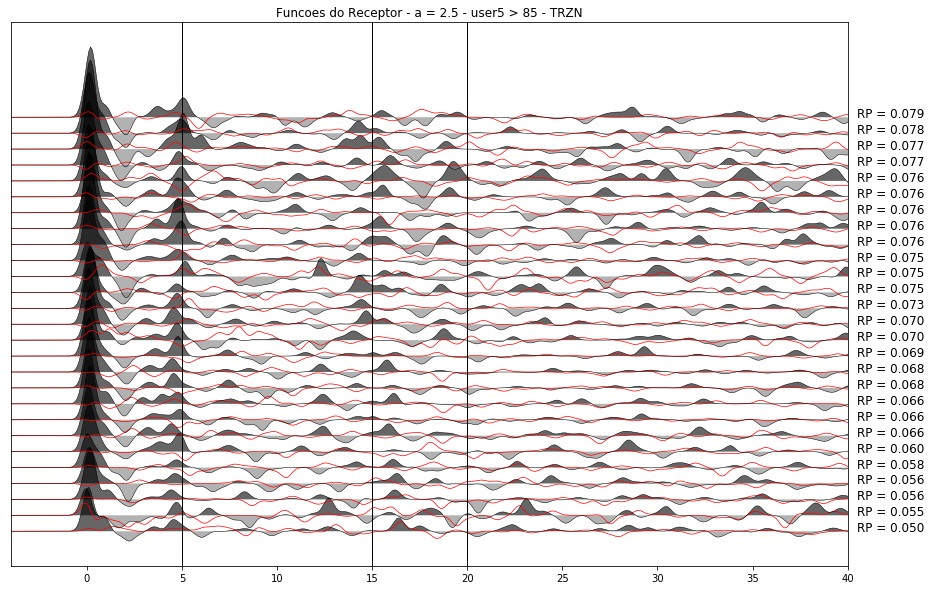

In [150]:
factor = 5
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl_bom_30_25): 
    plt.plot(RFTbom_30_25[i].times()-10,j/factor+RFTbom_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30_25[i].times()-10,j/factor+RFRbom_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/factor+RFRbom_30_25[i].data,j/factor,where=(j/factor+RFRbom_30_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/factor+RFRbom_30_25[i].data,j/factor,where=(j/factor+RFRbom_30_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(40.5,j/factor,"RP = "+"{0:.3f}".format(RF_bom_p_30_25[i]),fontsize=12)
    #plt.text(40.5,j/factor,'BAZ = %s' % (RF_bom_baz_30_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - user5 > 85 - '+STA[z])
    plt.xlim(-4,40)

In [151]:
RF_stack_30_25_final = np.array(RFRbom_30_25).sum(axis=0)/len(RFRbom_30_25)

In [152]:
RFT_stack_30_25_final = np.array(RFTbom_30_25).sum(axis=0)/len(RFTbom_30_25)

In [153]:
RF_stack_30_25_final_user8 = sum([i.stats.sac.user8 for i in RFRbom_30_25])/len(RFRbom_30_25)

In [154]:
y_30_25_final = []
for i,j in enumerate(RFRbom_30_25): 
    y_30_25_final.append(j.data)

In [155]:
min_y_30_25_final = [min(a) for a in zip(*y_30_25_final)]
max_y_30_25_final = [max(a) for a in zip(*y_30_25_final)]

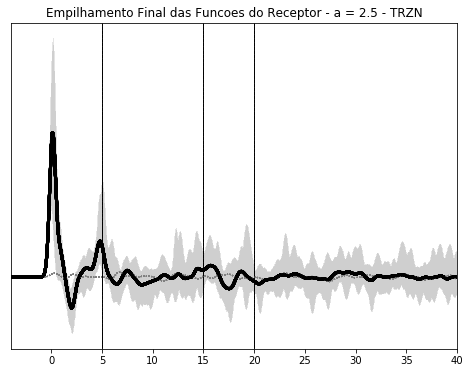

In [156]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RFRbom_30_25): 
    plt.plot(RF[1].times()-10,RFT_stack_30_25_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_25_final,'k',linewidth=3)
    plt.fill_between(RF_30_25[0].times()-10,min_y_30_25_final,max_y_30_25_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

Salvando as Funcoes do Receptor:

In [157]:
for i,j in enumerate(RFRbom_30_25):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8, 'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RF_name_30_25[i]+'.eqr')

In [158]:
for i,j in enumerate(RFTbom_30_25):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RF_name_30_25[i]+'.eqt')

Salvando o Empilhamento Final das Funcoes do Receptor:

In [159]:
header = {'kstnm': RFRbom_30_25[0].stats.sac.kstnm,'kevnm':RFRbom_30_25[0].stats.sac.kevnm,'stla': RFRbom_30_25[0].stats.sac.stla,
          'stlo': RFRbom_30_25[0].stats.sac.stlo,'user8':RF_stack_30_25_final_user8,'delta': RFRbom_30_25[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RF_stack_30_25_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/BP.'+STA[z]+'.T:a=2.5.eqr')

In [160]:
header = {'kstnm': RFRbom_30_25[0].stats.sac.kstnm,'kevnm':RFRbom_30_25[0].stats.sac.kevnm,'stla': RFRbom_30_25[0].stats.sac.stla,
          'stlo': RFRbom_30_25[0].stats.sac.stlo,'user8':RF_stack_30_25_final_user8,'delta': RFRbom_30_25[0].stats.sac.delta}
sac = op.io.sac.SACTrace(data=RFT_stack_30_25_final, **header)
sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/BP.'+STA[z]+'.T:a=2.5.eqt')